In [4]:
import spotify_ver2 as spotify
import spotipy
import os
from spotipy.oauth2 import SpotifyOAuth
from dotenv import load_dotenv

artist_name = "Taylor Swift" # name of the artist you want to create the playlist
token = spotify.get_token()
artist_id = spotify.search_for_artist_id(token, artist_name=artist_name) # get the artist_id
artist_full_name = spotify.search_for_artist_name(token, artist_name=artist_name) # get the artist's full name
track_id = list(spotify.get_track_id_by_artist(token, artist_id)) # get the track_id of all the artist tracks available on Spotify
no_tracks = len(track_id) # number of tracks

# add the playlist of above tracks to Spotify
scope = 'playlist-modify-public'
sp = spotipy.Spotify(auth_manager=SpotifyOAuth(scope=scope))
results = sp.user_playlist_create(user='taominh127', name=f'All songs of {artist_full_name}', description=f'All the songs of {artist_full_name} available on Spotify.')
new_playlist = sp.user_playlists(user='taominh127', limit=1)
playlist_id = new_playlist['items'][0]['id']

if no_tracks < 100: # we can add at most 100 songs to a playlist at a time
    sp.playlist_add_items(playlist_id=playlist_id, items=track_id)
else:
    x = 0
    while x + 100 < no_tracks:
        sp.playlist_add_items(playlist_id=playlist_id, items = track_id[x:x+100])
        x += 100
    
    sp.playlist_add_items(playlist_id=playlist_id, items = track_id[x:no_tracks])

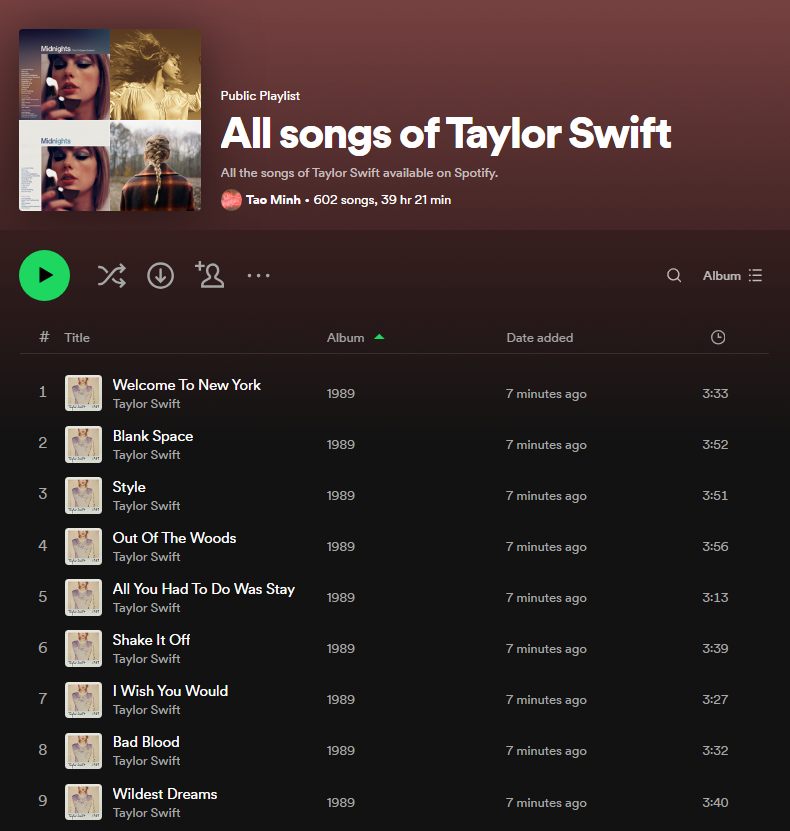